In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
dataset=pd.read_csv("IRIS (1).csv")

In [16]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
type(dataset)

pandas.core.frame.DataFrame

In [11]:
#dataset=df
df=dataset
df.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [21]:
x=df.iloc[:,:4]

In [22]:
y=df.iloc[:,-1]

In [23]:
x,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 0         Iris-setosa
 1         Iris-setosa
 2         Iris-setosa
 3         Iris-setosa
 4         Iris-setosa
             ...      
 145    Iris-virginica
 146    Iris-virginica
 147    Iris-virginica
 148    Iris-virginica
 149    Iris-virginica
 Name: speci

In [24]:
from sklearn.model_selection import train_test_split as tts

In [25]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.3)

In [26]:
x_train.shape

(105, 4)

In [27]:
y_train.shape

(105,)

In [ ]:
y_test

56     1
35     0
122    2
142    2
134    2
32     0
48     0
75     1
84     1
128    2
124    2
14     0
31     0
120    2
60     1
140    2
13     0
34     0
71     1
76     1
23     0
127    2
70     1
149    2
117    2
10     0
28     0
135    2
141    2
66     1
53     1
43     0
131    2
63     1
45     0
107    2
6      0
36     0
33     0
47     0
81     1
62     1
40     0
0      0
86     1
Name: target, dtype: int64

In [28]:
x_test.shape

(45, 4)

In [29]:
y_test.shape

(45,)

In [30]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(n_estimators= 10, criterion="entropy")
model1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [31]:
predict=model1.predict(x_test)
predict

array(['Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

In [32]:
model1.score(x_test,y_test)

0.9777777777777777

In [33]:
model1.score(x_train,y_train)

1.0

In [34]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
predict=model.predict(x_test)

In [36]:
predict.shape

(45,)

In [37]:
training_score=model.score(x_train,y_train)
training_score

1.0

In [38]:
test_score=model.score(x_test,y_test)
test_score

0.9333333333333333

In [40]:
model.score(x_train,y_train)

1.0

In [41]:
model.score(x_test,y_test)

0.9333333333333333

In [42]:

tree_param={"max_depth":[3,None],
            "criterion":['gini','entropy'],
            "max_features":range(1,7),
           "min_samples_leaf":range(1,7)}


In [43]:
tree=DecisionTreeClassifier()

In [44]:
from sklearn.model_selection import RandomizedSearchCV
tuned_model=RandomizedSearchCV(tree,tree_param,cv=5)

In [45]:
tuned_model.fit(x_train,y_train)

C:\Users\Ayan Pramanik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ayan Pramanik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ayan Pramanik\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Ayan Pramanik\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueEr

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': range(1, 7),
                                        'min_samples_leaf': range(1, 7)})

In [46]:
tuned_model.score(x_train,y_train)

0.9904761904761905

In [47]:
tuned_model.score(x_test,y_test)

0.9555555555555556

In [48]:
tuned_model.best_score_

0.9714285714285713

In [49]:
tuned_model.best_params_

{'min_samples_leaf': 2,
 'max_features': 3,
 'max_depth': None,
 'criterion': 'gini'}

In [ ]:
from sklearn.tree import export_graphviz
clf=DecisionTreeClassifier()
# Export the decision tree to a dot file
export_graphviz(model,
                feature_names=dataset.feature_names,
                class_names=dataset.target_names,
                filled=True, rounded=True,
                special_characters=True)

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label=<petal length (cm) &le; 2.45<br/>gini = 0.665<br/>samples = 105<br/>value = [32, 37, 36]<br/>class = versicolor>, fillcolor="#fcfffd"] ;\n1 [label=<gini = 0.0<br/>samples = 32<br/>value = [32, 0, 0]<br/>class = setosa>, fillcolor="#e58139"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<petal width (cm) &le; 1.75<br/>gini = 0.5<br/>samples = 73<br/>value = [0, 37, 36]<br/>class = versicolor>, fillcolor="#fafefc"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label=<petal length (cm) &le; 4.95<br/>gini = 0.176<br/>samples = 41<br/>value = [0, 37, 4]<br/>class = versicolor>, fillcolor="#4ee88f"] ;\n2 -> 3 ;\n4 [label=<petal width (cm) &le; 1.65<br/>gini = 0.054<br/>samples = 36<br/>value = [0, 35, 1]<br/>class = versicolor>, fillcolor="#3fe685"] ;\n3 -> 4 ;\n5 [label=<gini = 0.0<br/>samples = 35<br

[Text(0.3333333333333333, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.666\nsamples = 105\nvalue = [34, 37, 34]'),
 Text(0.16666666666666666, 0.75, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.75, 'X[3] <= 1.75\ngini = 0.499\nsamples = 71\nvalue = [0, 37, 34]'),
 Text(0.3333333333333333, 0.5833333333333334, 'X[0] <= 4.95\ngini = 0.139\nsamples = 40\nvalue = [0, 37, 3]'),
 Text(0.16666666666666666, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.4166666666666667, 'X[2] <= 4.95\ngini = 0.097\nsamples = 39\nvalue = [0, 37, 2]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.6666666666666666, 0.25, 'X[3] <= 1.55\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8333333333333334, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.6666666666666666, 0.5833333333333334, 'gini = 0.0\nsamples = 31\nv

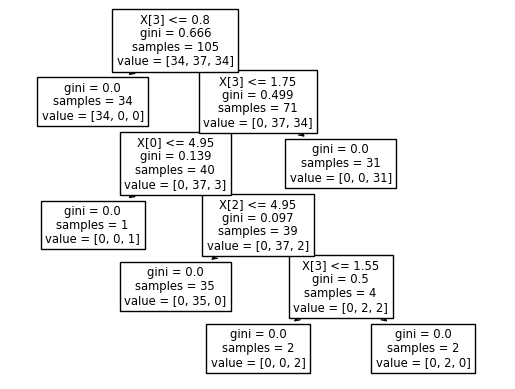

In [50]:
from sklearn import tree
tree.plot_tree(model)